# Assignment 4 - Multilayer Perceptron.

## Ques. 1: 
**Implement a multi-layer perceptron (MLP) by modifying the MLP program from the class to solve the XOR problem and train it to translate the digital letters given in file pattern1 into the corresponding ASCII representation. In the file, each letter of the alphabet is represented by a matrix of 12x13 binary values so that each consecutive 12 rows represent one letter. Plot a training curve and interpret your results.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import *
%matplotlib inline

Defining the input values:

In [2]:
X=np.array([[0,0,1,1],
         [0,1,0,1],
         [1,1,1,1]])
Y=np.array([0,1,1,0])

Initializing the model Parameters & Specification

In [3]:
# model specifications
Ni=3; Nh=4; No=1;
np.random.seed(100)
#parameter and array initialization
Ntrials=3500
h=np.zeros(Nh); y=np.zeros(No)
wh=np.random.randn(Nh,Ni); wo=np.random.randn(No,Nh) 
dwh=np.zeros(wh.shape); dwo=np.zeros(wo.shape) 
dh=np.zeros(Nh); do=np.zeros(No)
error=np.array([])

Training the model

In [4]:
for trial in range(Ntrials):       
    h = 1/(1+np.exp(-wh@X))
    y = 1/(1+np.exp(-wo@h))
    #y = y.T
        
    do=y*(1-y)*(Y-y) 
    dh = (h*(1-h))*(wo.T@do)
        
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
        
    
    # test all pattern    
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))  
    error = np.append(error, np.sum(abs(y - Y)))

C:\Users\dalal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


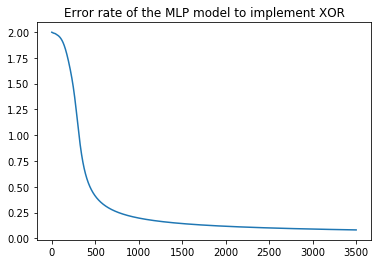

In [5]:
h_t=1/(1+np.exp(-wh@X))
y_t=1/(1+np.exp(-wo@h_t))
a = ""
y_out = []
for o in range(y_t.shape[1]):
    a = int(round(y_t[0,o]))
    y_out = np.append(y_out,a)
        
m = plt.figure(2)
plt.plot(error)
plt.title('Error rate of the MLP model to implement XOR')
m.show()

Testing the XOR

In [6]:
h_t=1/(1+np.exp(-wh@X))
y_t=1/(1+np.exp(-wo@h_t))
a = ""
y_out = []
for o in range(y_t.shape[1]):
    a = int(round(y_t[0,o]))
    y_out = np.append(y_out,a)
print(y_out)

[ 0.  1.  1.  0.]


After doing trial and errors for number of trials required to make error 0, I selected 3500 as total number of trials. As you can see from the test, the accuracy is 100%.

**Training on pattern1:**

**How I decided the number of inital input nodes and number of hidden nodes?**

Number of input nodes: As each character is represented by a 12 X 13 matrix and as 12*13 = 156. I have shape the data as 156,26 dimension of the X(input feature).

Number of Hidden Nodes: By trial error, i tried various different rnadom values for the number of the hidded nodes. At 16, i got 100 % accuracy and hence selected 16.

In [7]:
np.random.seed(100)
def binaryToAscii(value):
    return chr(int(value, base=2))

def mlp_fit(X_train,y_train,nh):
    Ni=156; Nh1=nh; No=7;
    #parameter and array initialization
    Ntrials=1000
    h1=np.zeros(Nh1); y=np.zeros(No)
    #h2=np.zeros(Nh2); wh2=np.random.randn(Nh2,Nh1); dwh2=np.zeros(wh2.shape); dh2=np.zeros(Nh2);
    wh1=np.random.randn(Nh1,Ni);  wo=np.random.randn(No,Nh1) 
    dwh1=np.zeros(wh1.shape);  dwo=np.zeros(wo.shape) 
    dh1=np.zeros(Nh1);  do=np.zeros(No)  
    error=np.array([])

    for trials in range(Ntrials):
        h1 = 1/(1+np.exp(-wh1@X_train))
        y = 1/(1+np.exp(-wo@h1))
        y = y.T
        
        do=y*(1-y)*(Y-y) 
        dh1 = (h1*(1-h1))*(wo.T@do.T)
        
        dwo=0.9*dwo+do.T@h1.T
        wo=wo+0.1*dwo
        
        dwh1=0.9*dwh1+dh1@X_train.T
        wh1=wh1+0.1*dwh1
        
        error = np.append(error, np.sum(abs(y_train - y)))

    return wh1,wo,error

Predict fn:

In [8]:
def pred(X_train,y_train,wh1,wo):
    h_test=1/(1+np.exp(-wh1@X_train))
    y_test=1/(1+np.exp(-wo@h_test))
    

    v= ""; w=""
    count = 0
    for i,j in zip(y_test.T,y_train):
        v = ""; w=""
        for k,l in zip(i,j):
            v += str(int(round(k)))
            w += str(int(round(l)))
        if(v == w):
            count+=1
        #print(binaryToAscii(v))

    acc = count/26*100
    return acc

In [9]:
X = np.array(np.loadtxt('pattern1.txt'))
X_train = X.reshape(156,26)
Y = []
for i in range(65,91):
    Y.append([int(x) for x in list('{0:0b}'.format(i))])
Y = np.array(Y)   
y_train = Y.reshape(26,7)

wh,wo,error = mlp_fit(X_train,y_train,16)

**Plotting the training curve**

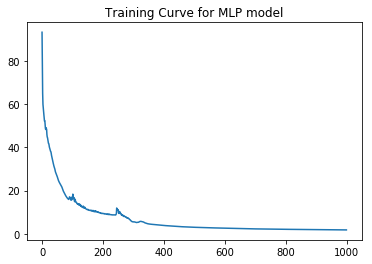

In [10]:
plt.plot(error)
plt.title('Training Curve for MLP model')
plt.show()

**Accuracy of the Model**

In [11]:
acc = pred(X_train,y_train,wh,wo)
print('The accuracy for the model is:'+ str(acc) + '%')
#Below method is same as pred fn just wanted to print the letters also and hence called here
print('Original     Predicted')
h_test=1/(1+np.exp(-wh@X_train))
y_test=1/(1+np.exp(-wo@h_test))
v= ""; w=""
count = 0
for i,j in zip(y_test.T,y_train):
    v = ""; w=""
    for k,l in zip(i,j):
        v += str(int(round(k)))
        w += str(int(round(l)))
    print('  '+binaryToAscii(w)+'               '+binaryToAscii(v))

The accuracy for the model is:100.0%
Original     Predicted
  A               A
  B               B
  C               C
  D               D
  E               E
  F               F
  G               G
  H               H
  I               I
  J               J
  K               K
  L               L
  M               M
  N               N
  O               O
  P               P
  Q               Q
  R               R
  S               S
  T               T
  U               U
  V               V
  W               W
  X               X
  Y               Y
  Z               Z


## Ques. 2: 
**Investigate how much noise the MLP can tolerate in the pattern before being unable to recognize a letter. Explain your implementation of noise and report your results.**

**Method implemented to add the noise:** <br />
                                 First, calculated the total number of rows(noise_r)and columns(noise_c) according to the percentage of the noise to add. Later, I have iterate the loop noise_r times and selecting the row index randomly (rand_r). Further, I have added nested loop which runs noise_c times and similarly select the coumn index(rand_c). Once the row index and column index is selcted randomly, method will flip 0 to 1 and vice versa.

In [12]:
def add_noise(X_train_noise, y_train_noise,wh,wo):
    no_acc = []
    for noise_per in range(3,15):
        noise_r = int(round(X_train_noise.shape[0]*noise_per/100))
        noise_c = int(round(X_train_noise.shape[1]*noise_per/100))
        for i in range(noise_r):
            rand_r = np.random.randint(0,156)
            for j in range(noise_c):
                rand_c = np.random.randint(0,26)
                if X_train_noise[rand_r,rand_c] == 0:
                    X_train_noise[rand_r,rand_c]=1
                elif X_train_noise[rand_r,rand_c] == 1:
                    X_train_noise[rand_r,rand_c]=0
        no_acc = np.append(no_acc,pred(X_train_noise,y_train_noise,wh,wo))
        print('Accuracy when '+str(noise_per)+'% noise added:'+str(no_acc[-1]))
    #print(no_acc)
    plt.plot(no_acc)
    plt.xlabel('Noise Percent')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Noise')
    plt.show()


Accuracy when 3% noise added:100.0
Accuracy when 4% noise added:100.0
Accuracy when 5% noise added:100.0
Accuracy when 6% noise added:92.3076923077
Accuracy when 7% noise added:92.3076923077
Accuracy when 8% noise added:88.4615384615
Accuracy when 9% noise added:84.6153846154
Accuracy when 10% noise added:73.0769230769
Accuracy when 11% noise added:73.0769230769
Accuracy when 12% noise added:65.3846153846
Accuracy when 13% noise added:65.3846153846
Accuracy when 14% noise added:46.1538461538


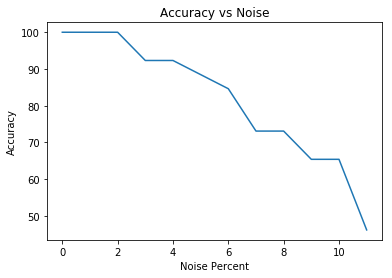

In [13]:
X_2 = np.array(np.loadtxt('pattern1.txt'))
X_train_n = X_2.reshape(156,26)
    
Y_2 = []
for i in range(65,91):
    Y_2.append([int(x) for x in list('{0:0b}'.format(i))])
Y_2 = np.array(Y_2)   
y_train_n = Y_2.reshape(26,7)

wh_n,wo_n,error_n = mlp_fit(X_train_n,y_train_n,16)

acc_no=add_noise(X_train_n,y_train_n,wh_n,wo_n)

It is evident from the graph that, as the noise increases the accuracy decreases. The model can give you the accuracy above 70% till 10% noise added in the data. It can also be seen from the graph that the model can predict with 100% accuracy even with 5% noisy data. However, there is steep decline in the accuracy when 14% noise is added.

## Ques. 3: 
**Which letter is represented in file pattern2?**

In [15]:
from collections import Counter
char =[]
def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)
X_3 = np.array(np.loadtxt('pattern2.txt'))
X_3=X_3.reshape(156,)
for i in range(100):
    #Train
    wh_3,wo_3,error_n = mlp_fit(X_train_n,y_train_n,16)
    #pred
   
    b=""
    
    h_3=1/(1+np.exp(-wh_3@X_3))
    y_3=1/(1+np.exp(-wo_3@h_3))
    for j in y_3:
        b += str(int(round(j)))
            #print(b)
    char.append(chr(int(b,2)))
data = Counter(char)
p = max(char, key=data.get)
print('Pattern is '+p+' as it is repeated '+str(data[p])+' out of 100 times')

Pattern is L as it is repeated 11 out of 100 times


## Ques. 4: 
**Investigate the network performance when training on noisy patterns. Also, how does the number of hidden nodes influence the performance?**

In [16]:
from random import *
X_4 = np.array(np.loadtxt('pattern1.txt'))
X_train_4 = X_4.reshape(156,26)
Y_4 = []
for i in range(65,91):
    Y_4.append([int(x) for x in list('{0:0b}'.format(i))])
Y_4 = np.array(Y_4)   
y_train_4 = Y_4.reshape(26,7)

#Adding the noise:
noise_c = int(round(X_train_4.shape[1]*9/100))
for i in range(10):
    for i in range(noise_c):
        rand_c = randint(0,25)
        for i in range(10):
            rand_r = randint(0,155)
            if X_train_4[rand_r,rand_c] == 0:
                X_train_4[rand_r,rand_c]=1
            elif X_train_4[rand_r,rand_c] == 1:
                X_train_4[rand_r,rand_c]=0
#Fitting on the noisy data set
wh_4,wo_4,error_4 = mlp_fit(X_train_4,y_train_4,16)


#Prediction:
h_test_4=1/(1+np.exp(-wh_4@X_train))
y_test_4=1/(1+np.exp(-wo_4@h_test_4))    
v_4= ""; w_4=""
count = 0
print('Original----Predicted')
for i,j in zip(y_test_4.T,y_train_4):
    v_4 = ""; w_4 =""
    for k,l in zip(i,j):
        v_4 += str(int(round(k)))
        w_4 += str(int(round(l)))
    if(v_4 == w_4):
        count+=1
    print('  '+binaryToAscii(w_4)+'             '+binaryToAscii(v_4))

acc = count/26*100

Original----Predicted
  A             E
  B             G
  C             C
  D             P
  E             Q
  F             F
  G             G
  H             H
  I             I
  J             J
  K             K
  L             X
  M             M
  N             L
  O             O
  P             P
  Q             Q
  R             S
  S             T
  T             T
  U             U
  V             V
  W             R
  X             X
  Y             Y
  Z             M


In [17]:
print('Accuracy after training on noisy data and predicting on the actual data(pattern1):',acc)

Accuracy after training on noisy data and predicting on the actual data(pattern1): 61.53846153846154


There is decrease in the accuracy of the prediction. The reason for decline is the weights obtain from training also contains noise. When the training data contains noise, the parameters of the model also consist the noise (in our scenario wieghts).
Thus, the noisy wieghts will affect the overall accuracy of the model.

### Hidden Nodes:

#### 10 hidden nodes

Accuracy: 57.692307692307686


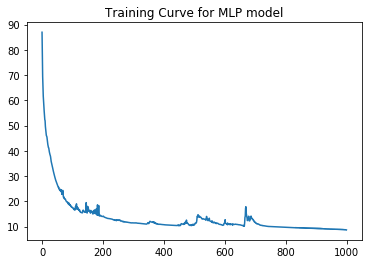

In [18]:
wh_20,wo_20,error_20 = mlp_fit(X_train_4,y_train_4,10)


#Prediction:
acc = pred(X_train,y_train,wh_20,wo_20)
print('Accuracy:', acc)
plt.plot(error_20)
plt.title('Training Curve for MLP model')
plt.show()

#### 26 hidden nodes

Accuracy: 80.76923076923077


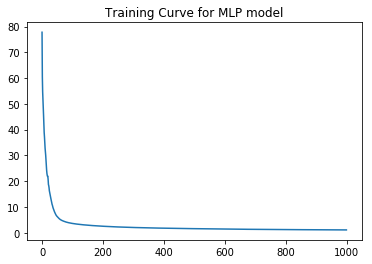

In [19]:
wh_26,wo_26,error_26 = mlp_fit(X_train_4,y_train_4,26)


#Prediction:
acc = pred(X_train,y_train,wh_26,wo_26)
print('Accuracy:', acc)
plt.plot(error_26)
plt.title('Training Curve for MLP model')
plt.show()

#### 130 hidden nodes

Accuracy: 76.92307692307693


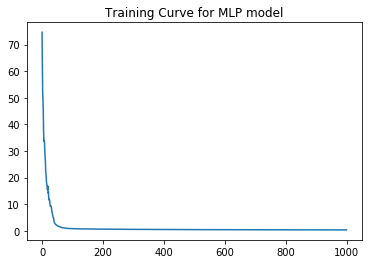

In [21]:
wh_130,wo_130,error_130 = mlp_fit(X_train_4,y_train_4,130)


#Prediction:
acc = pred(X_train,y_train,wh_130,wo_130)
print('Accuracy:', acc)
plt.plot(error_130)
plt.title('Training Curve for MLP model')
plt.show()

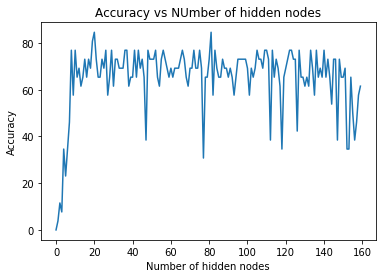

In [22]:
acc=np.array([])
for i in range(160):
    wh_h,wo_h,error_h = mlp_fit(X_train_4,y_train_4,i)


    #Prediction:
    acc = np.append(acc,pred(X_train,y_train,wh_h,wo_h))
    #print('Accuracy:', acc)
plt.plot(acc)
plt.title('Accuracy vs NUmber of hidden nodes')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.show()

The above graph is the representation of the calculated accuracy for different number of nodes in the hidden layer f the model. The hidden number of nodes is selected in range of 0-150. It is evident from the figure that the accuracy remains less uptil 20 nodes. However, the accuracy is increasing and decreasing abruptly around 60-70% when the number of nodes is more than 20. But, the best value for the number of nodes in the hidden layer is either around 26 or 130. It can give the accuracy above 70%.